<a href="https://colab.research.google.com/github/jlazo3010/prueba_tecnica/blob/main/Anal%C3%ADsis_caso_practico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importación de paquetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Prueba_tecnica/Prueba técnica.xlsx') #Extracción de los datos

In [ ]:
df.head(10)#Visualizamos los datos

In [ ]:
df.shape #numero de filas y columnas

In [ ]:
df.columns.values #Nombres de las columnas

In [ ]:
df.dtypes #tipo de dato de cada columna

In [ ]:
#Buscamos la cantidad de Na's dentro de cada columna del conjunto de datos
Na = []
for i in df.columns.values:
  x = pd.isnull(df[str(i)]).values.ravel().sum()
  print('Hay un total de ' + repr(x)  + ' valores Na en la columna ' + i)

In [ ]:
#Tratamiento de Na´s
df['Puntaje admisión'] = df['Puntaje admisión'].fillna(df['Puntaje admisión'].mean())
df['PAA Mate'] = df['PAA Mate'].fillna(df['PAA Mate'].mean())
df['Promedio Nivel Anterior'] = df['Promedio Nivel Anterior'].fillna(df['Promedio Nivel Anterior'].mean())
df['Toefl'] = df['Toefl'].fillna(df['Toefl'].mean())
df= df.dropna(axis=0, how='any')

In [ ]:
retencion = df['Retención.1er.año'].value_counts()

Text(0, 0.5, '')

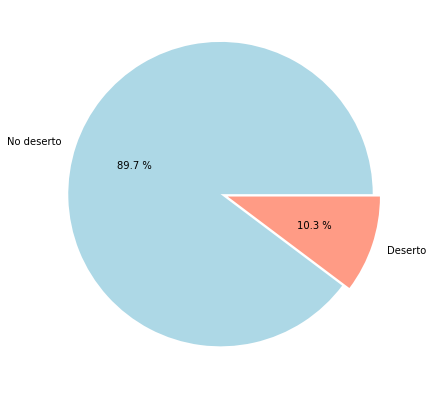

In [ ]:
colores = [ "lightblue","#FF9B85"]
desfase = (0.05,0)
retencion.plot.pie(y=retencion,figsize = (10,7),autopct="%0.1f %%", 
                   colors=colores,explode=desfase, labels = ['No deserto', 'Deserto'])
plt.ylabel('') 

In [ ]:
df.groupby('Retención.1er.año').mean() #Agrupamos datos numericos por Retención.1er.año

,Edad,Promedio Nivel Anterior,Puntaje admisión,PAA Mate,Toefl,Escuela.Acreditada,Unidades,FTE,Full Tuition,Monto total pagado unid insc adm,Monto pago beca ITESM,%Beca,Monto pago préstamo ITESM,Becado
Retención.1er.año,,,,,,,,,,,,,,
0,19.180290,83.334574,1274.776869,636.634562,488.954242,0.250000,47.659574,0.992905,0.928457,84782.212766,6126.776596,7.154322,7994.175532,0.244681
1,18.703085,85.460319,1313.455784,662.882488,521.712546,0.298662,51.148418,1.065589,0.859457,91056.833333,12889.125912,14.054270,8153.718370,0.402068


Text(0, 0.5, 'Cantidad')

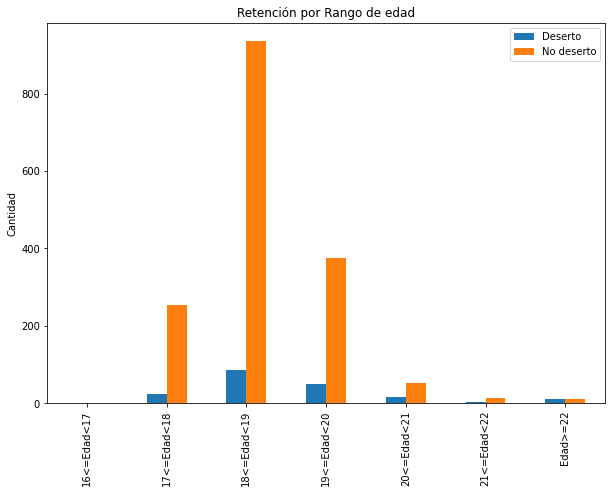

In [ ]:
pd.crosstab(df['Rangos.Edad'], df['Retención.1er.año']).plot(kind='bar', figsize = (10,7))
plt.title('Retención por Rango de edad')
plt.legend(['Deserto','No deserto'])
plt.xlabel('')
plt.ylabel('Cantidad')
#Al parecer los rangos de edad de entre los 17 y 21 años hubo más deserción

Text(0, 0.5, 'Cantidad')

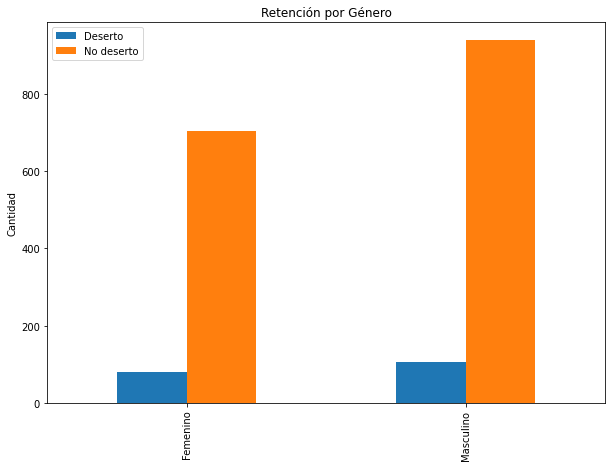

In [ ]:
pd.crosstab(df['Género'], df['Retención.1er.año']).plot(kind='bar', figsize = (10,7))
plt.title('Retención por Género')
plt.legend(['Deserto','No deserto'])
plt.xlabel('')
plt.ylabel('Cantidad')
#Hubo mayor retención en Hombres que en Mujeres

Text(0, 0.5, 'Cantidad')

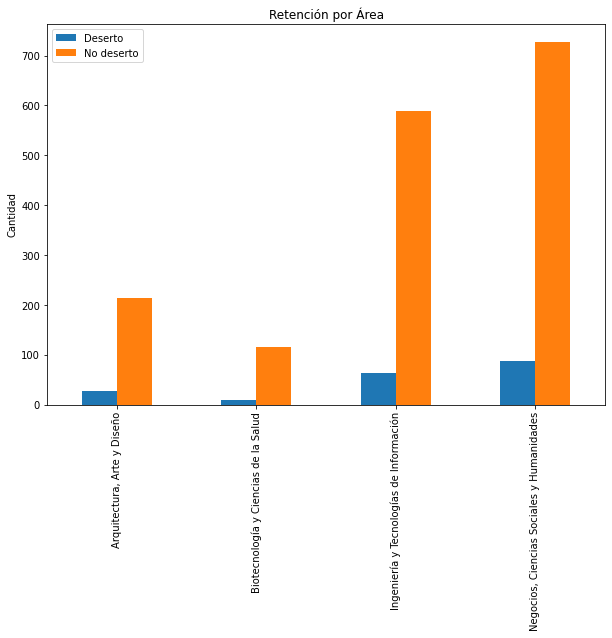

In [ ]:
pd.crosstab(df['Área'],df['Retención.1er.año']).plot(kind='bar', figsize = (10,7))
plt.title('Retención por Área')
plt.legend(['Deserto','No deserto'])
plt.xlabel('')
plt.ylabel('Cantidad')
#Retención por Áreas

In [ ]:
#Definimos las variables para generar Dummies y quitamos variables 
df_modificado = df.drop(['Campus','Matricula','Clave.Escuela','Clave beca','Tipo.Baja',
                         'Nacionalidad','Programa.Tronco.Comun','Ciudad Domicilio','Estado Domicilio','Estado Escuela',
                         'Nombre Escuela','Municipio Escuela','Ciudad Escuela','Periodo','Foraneo'], axis=1)
categorias = ['Rangos.Edad','Género','ExUbiMate','Participación.DAE','Área',
              'Programa','Nivel','Perfil','País Domicilio','Pais Escuela','Ind Escuela Itesm',
              'Escuela.Acreditada','Ind Escuela Nacional','Carga Académica','Becado','Tipo.Beca',
              'Desc Beca']

In [ ]:
#Creamos las variables Dummies y se las agregamos a nuestro dataset modificado
for category in categorias:
  cat_list = 'cat' + '_' + category
  cat_dummies = pd.get_dummies(df_modificado[str(category)], prefix=str(category))
  df_nuevo = df_modificado.join(cat_dummies, lsuffix= category)
  df_modificado = df_nuevo

In [ ]:
df_var = df_modificado.columns.values.tolist()

In [ ]:
keep = [v for v in df_var if v not in categorias] 
df_analisis = df_modificado[keep] #Elegimos las categorias que no esten en nuestra lista de categorias

In [ ]:
df_analisis_var = df_analisis.columns.values.tolist()
Y = ['Retención.1er.año'] #columna a predecir
X = [v for v in df_analisis_var if v not in Y] #columnas predictoras

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_analisis[X], df_analisis[Y], test_size = 0.2)
#Definimos el cconjunto de entrenamiento y testeo de nuestro modelo

In [ ]:
from sklearn.preprocessing import StandardScaler
escalar = StandardScaler()
X_train = escalar.fit_transform(X_train)
X_test = escalar.fit_transform(X_test)
#Transformamos los datos para nuestro modelo

In [ ]:
lr = LogisticRegression() #Generamos el modelo

In [ ]:
n=100
rfe = RFE(lr,n)
rfe = rfe.fit(X_train, y_train.values.ravel()) #Entrenamos el modelo

In [ ]:
print(rfe.support_) #Valores a tomar en cuenta

[ True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True False  True  True  True
 False  True False  True  True False False False  True  True  True  True
  True  True  True False False  True  True  True  True  True False  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True False False False  True False False  True  True  True  True  True
  True False False False  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True]


In [ ]:
print(rfe.ranking_) #Ranking de valores a tomar en cuenta

[ 1  7  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 15  1 19  1  1  1 18  1 22  1  1 16 10 11  1  1  1  1
  1  1  1  6 13  1  1  1  1  1  4  1 23  1  1  1  1  1  1  1  1  1  1  1
  1  5  8 20  1 14  9  1  1  1  1  1  1  3 21 12  1  1  1  2  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1 17  1  1  1  1  1  1  1  1  1  1  1
  1  1]


In [ ]:
y_pred = rfe.predict(X_test) #Predecimos el conjunto de testeo

In [ ]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print(precision) #Medimos la predicción de nuestro modelo con metricas

0.8980169971671388


In [ ]:
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_pred)
print(exactitud) #Medimos la predicción de nuestro modelo con metricas

0.8910081743869209


In [ ]:
from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test, y_pred)
print(sensibilidad) #Medimos la predicción de nuestro modelo con metricas

0.9693251533742331


In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test,y_pred)
print(f1) #Medimos la predicción de nuestro modelo con metricas

0.9404761904761904


### Analizando las variables significativa

In [ ]:
Valores = []
for i in range(0,len(df_analisis_var)-2):
  if rfe.support_[i] == True and df_analisis_var[i] != 'Retención.1er.año':
    Valores.append(df_analisis_var[i])
print(Valores)
#Imprimimos las variables significativas de nuestro modelo

['Edad', 'Puntaje admisión', 'PAA Mate', 'Toefl', 'Unidades', 'FTE', 'Full Tuition', 'Monto total pagado unid insc adm', 'Monto pago beca ITESM', '%Beca', 'Monto pago préstamo ITESM', 'Rangos.Edad_16<=Edad<17', 'Rangos.Edad_17<=Edad<18', 'Rangos.Edad_18<=Edad<19', 'Rangos.Edad_19<=Edad<20', 'Rangos.Edad_20<=Edad<21', 'Rangos.Edad_21<=Edad<22', 'Rangos.Edad_Edad>=22', 'Género_Femenino', 'Género_Masculino', 'ExUbiMate_Aprobó', 'ExUbiMate_No aplica', 'ExUbiMate_No aprobó', 'ExUbiMate_No presentó', 'Participación.DAE_No', 'Participación.DAE_Sí', 'Área_Arquitectura, Arte y Diseño', 'Área_Biotecnología y Ciencias de la Salud', 'Área_Negocios, Ciencias Sociales y Humanidades', 'Programa_CPF', 'Programa_IA', 'Programa_IBT', 'Programa_IDA', 'Programa_IFI', 'Programa_IIS', 'Programa_INT', 'Programa_IQA', 'Programa_ISC', 'Programa_ISD', 'Programa_LAD', 'Programa_LAE', 'Programa_LAF', 'Programa_LDI', 'Programa_LED', 'Programa_LEF', 'Programa_LEM', 'Programa_LIN', 'Programa_LPO', 'Nivel_Profesional

#Analizamos las relaciones de las variables significativas con nuestra variable a predecir


Text(0, 0.5, 'Cantidad')

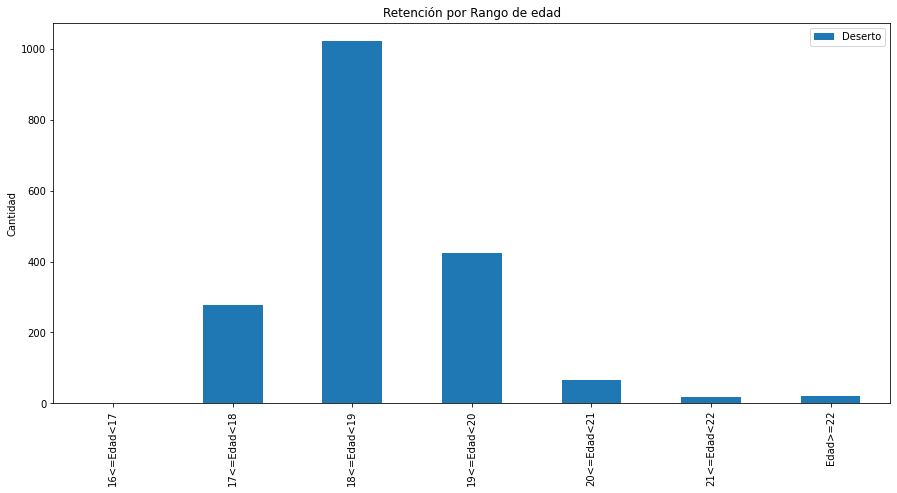

In [ ]:
pd.crosstab(df['Rangos.Edad'], df['Retención.1er.año'][0]).plot(kind='bar', figsize = (15,7))
plt.title('Retención por Rango de edad')
plt.legend(['Deserto','No deserto'])
plt.xlabel('')
plt.ylabel('Cantidad')
#Al parecer los rangos de edad de entre los 17 y 21 años hubo más deserción

In [ ]:
Desertar = df_modificado[df['Retención.1er.año'] == 0]

Text(0, 0.5, 'Frecuencia')

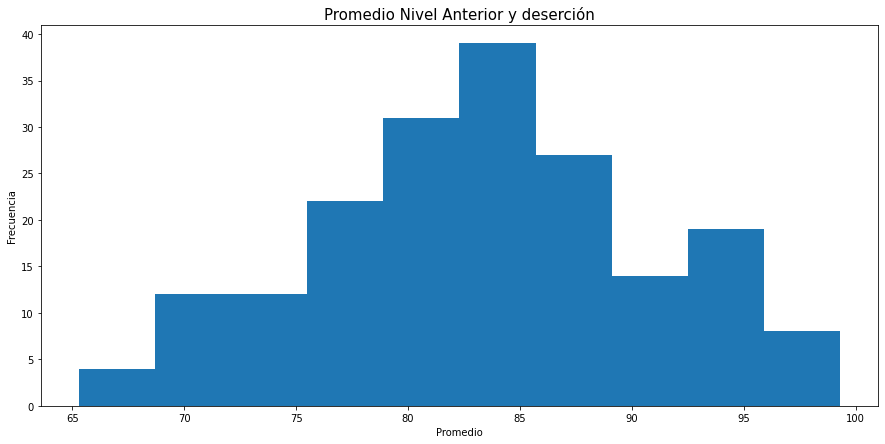

In [ ]:
Desertar['Promedio Nivel Anterior'].plot(kind='hist', figsize = (15,7))
plt.title('Promedio Nivel Anterior y deserción', fontsize = 15)
plt.xlabel('Promedio')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

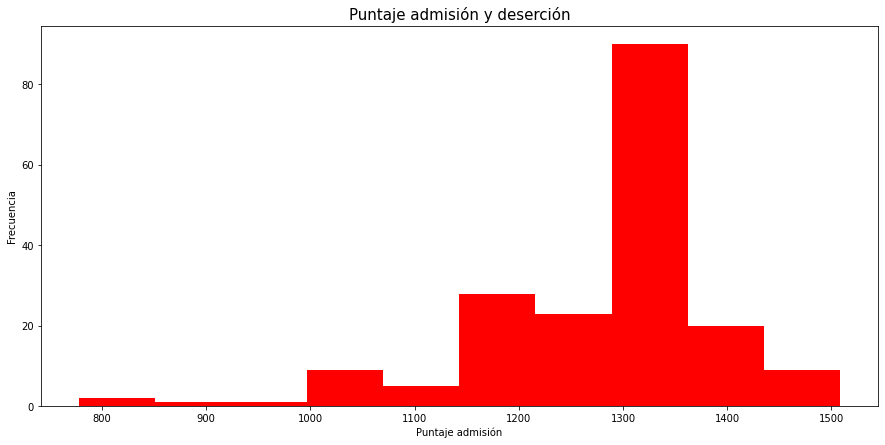

In [ ]:
Desertar['Puntaje admisión'].plot(kind='hist', figsize = (15,7), color = 'r')
plt.title('Puntaje admisión y deserción', fontsize = 15)
plt.xlabel('Puntaje admisión')
plt.ylabel('Frecuencia')

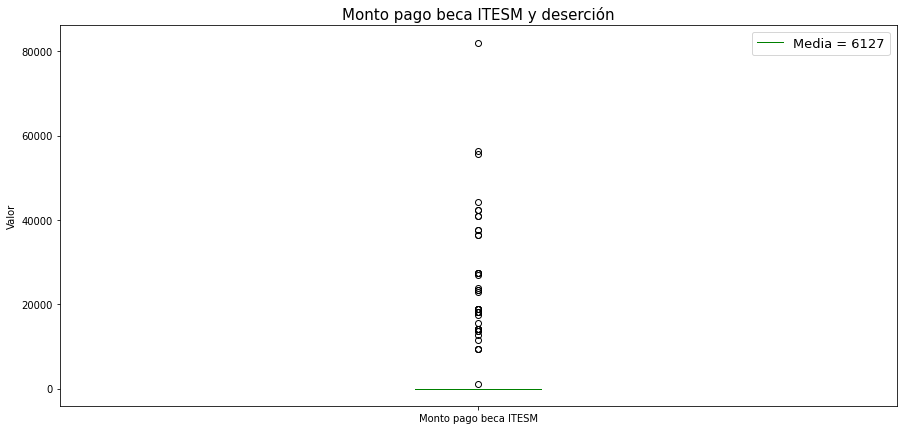

In [ ]:
Desertar['Monto pago beca ITESM'].plot(kind='box', figsize = (15,7), color = 'g')
plt.title('Monto pago beca ITESM y deserción', fontsize = 15)
plt.ylabel('Valor')
plt.legend(['Media = '+ str(round(Desertar['Monto pago beca ITESM'].mean()))], fontsize = 13)

Text(0, 0.5, 'Frecuencia')

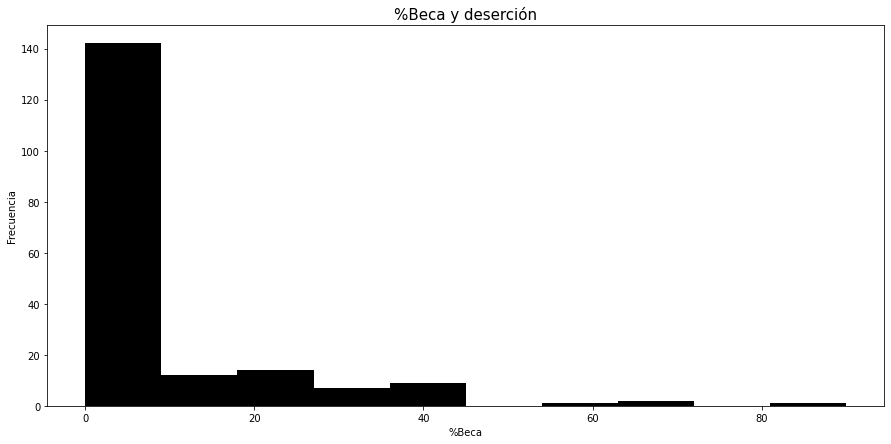

In [ ]:
Desertar['%Beca'].plot(kind='hist', figsize = (15,7), color = 'black')
plt.title('%Beca y deserción', fontsize = 15)
plt.xlabel('%Beca')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Cantidad')

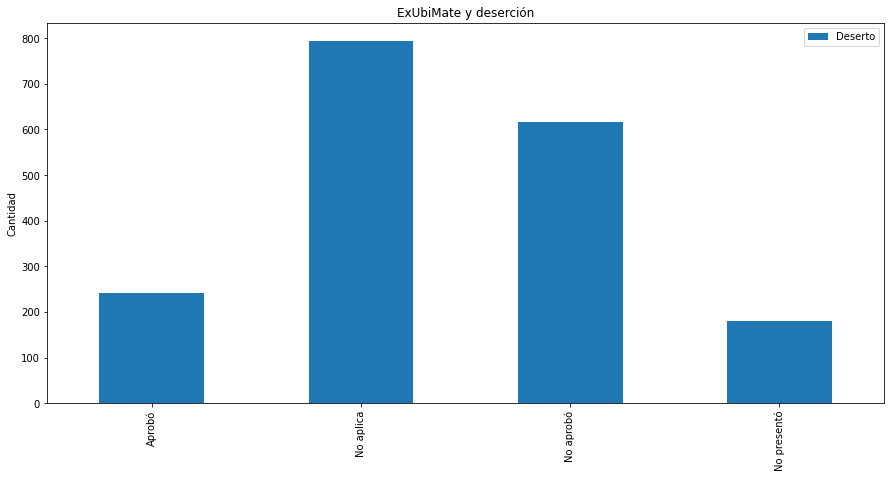

In [ ]:
pd.crosstab(df['ExUbiMate'], df['Retención.1er.año'][0]).plot(kind='bar', figsize = (15,7))
plt.title('ExUbiMate y deserción')
plt.legend(['Deserto','No deserto'])
plt.xlabel('')
plt.ylabel('Cantidad')

Text(0, 0.5, 'Cantidad')

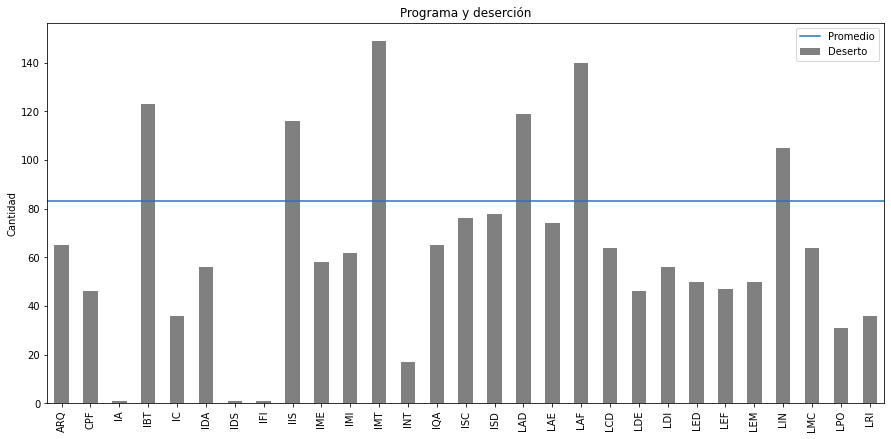

In [ ]:
pd.crosstab(df['Programa'], df['Retención.1er.año'][0]).plot(kind='bar', figsize = (15,7), color='gray')
plt.axhline(83.17, 0, 1, label='pyplot horizontal line')
plt.title('Programa y deserción')
plt.xlabel('')
plt.legend(['Promedio','Deserto'])
plt.ylabel('Cantidad')

Text(0, 0.5, 'Cantidad')

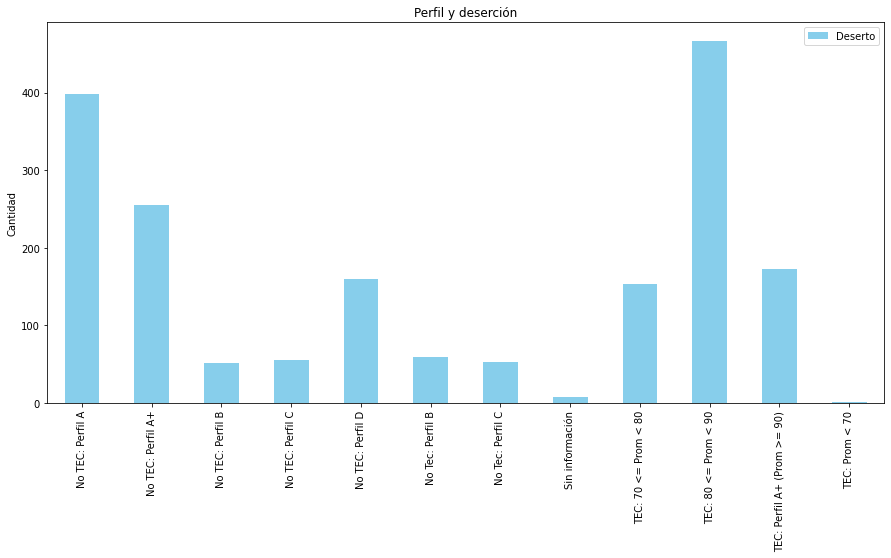

In [ ]:
pd.crosstab(df['Perfil'], df['Retención.1er.año'][0]).plot(kind='bar', figsize = (15,7), color='skyblue')
plt.title('Perfil y deserción')
plt.xlabel('')
plt.legend(['Deserto','No deserto'])
plt.ylabel('Cantidad')

Text(0, 0.5, 'Cantidad')

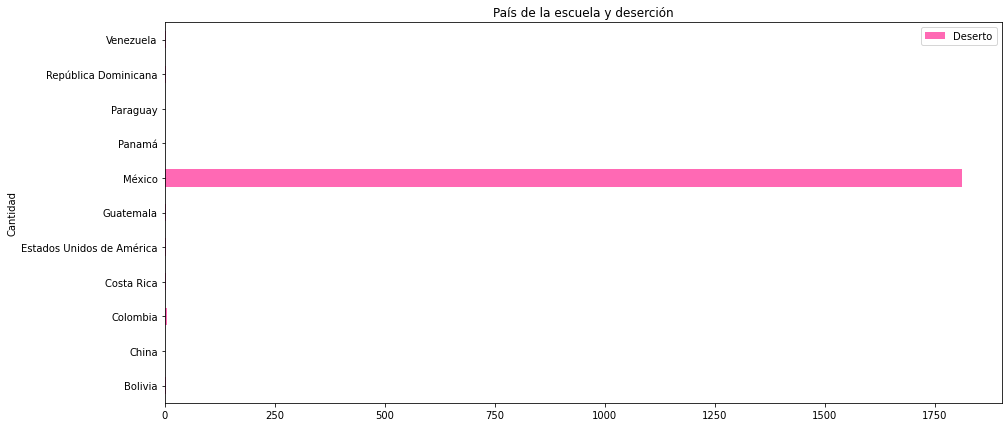

In [ ]:
pd.crosstab(df['Pais Escuela'], df['Retención.1er.año'][0]).plot(kind='barh', figsize = (15,7), color='hotpink')
plt.title('País de la escuela y deserción')
plt.xlabel('')
plt.legend(['Deserto','No deserto'])
plt.ylabel('Cantidad')

Text(0, 0.5, 'Cantidad')

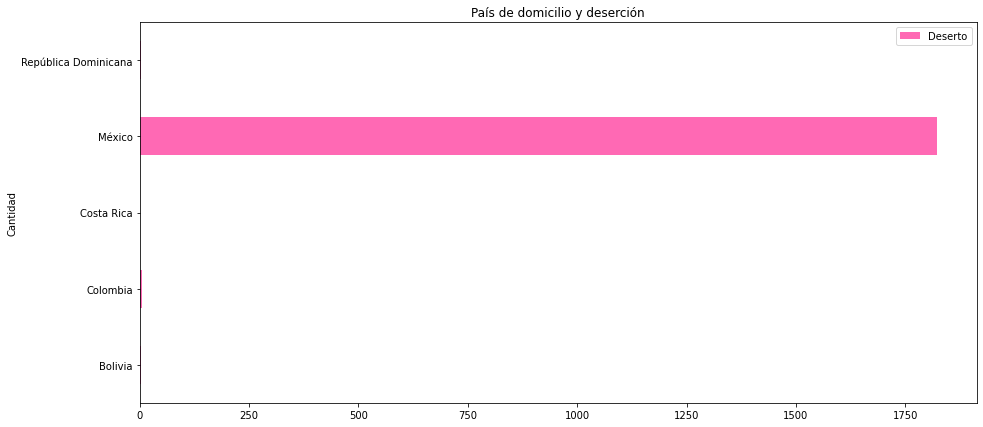

In [ ]:
pd.crosstab(df['País Domicilio'], df['Retención.1er.año'][0]).plot(kind='barh', figsize = (15,7), color='hotpink')
plt.title('País de domicilio y deserción')
plt.xlabel('')
plt.legend(['Deserto','No deserto'])
plt.ylabel('Cantidad')

Text(0, 0.5, 'Cantidad')

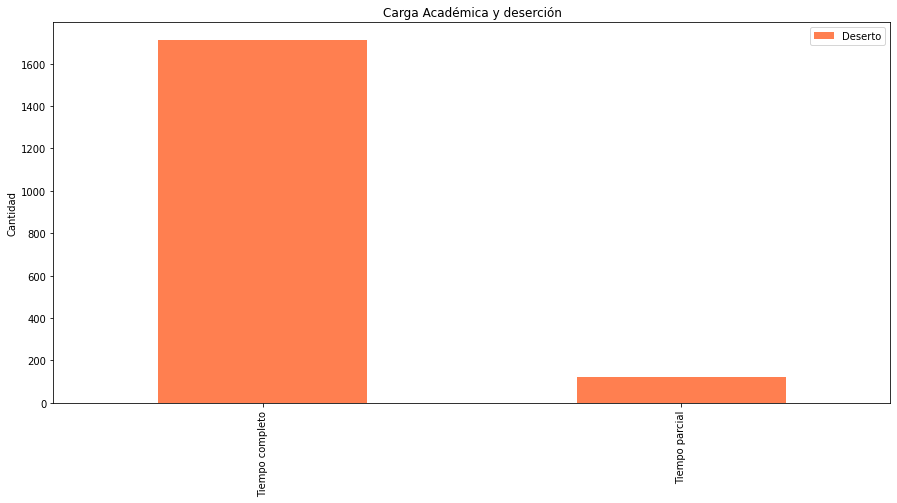

In [ ]:
pd.crosstab(df['Carga Académica'], df['Retención.1er.año'][0]).plot(kind='bar', figsize = (15,7), color='coral')
plt.title('Carga Académica y deserción')
plt.xlabel('')
plt.legend(['Deserto','No deserto'])
plt.ylabel('Cantidad')

Text(0, 0.5, 'Cantidad')

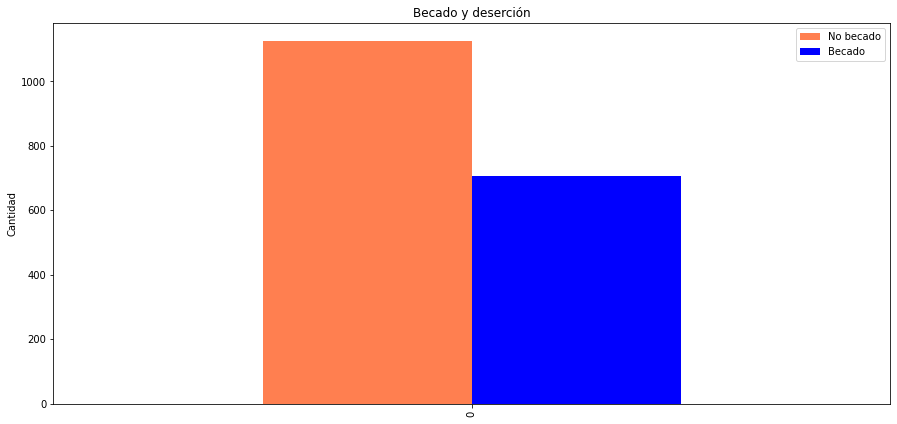

In [ ]:
pd.crosstab(df['Retención.1er.año'][0],df['Becado']).plot(kind='bar', figsize = (15,7), color=['coral','b'])
plt.title('Becado y deserción')
plt.xlabel('')
plt.legend(['No becado','Becado'])
plt.ylabel('Cantidad')

Text(0, 0.5, 'Cantidad')

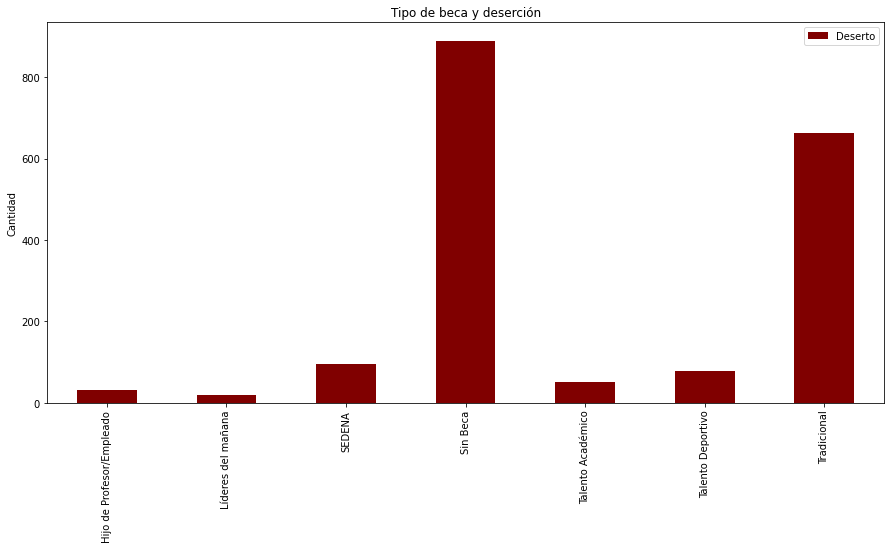

In [ ]:
pd.crosstab(df['Tipo.Beca'], df['Retención.1er.año'][0]).plot(kind='bar', figsize = (15,7), color='maroon')
plt.title('Tipo de beca y deserción')
plt.xlabel('')
plt.legend(['Deserto','No deserto'])
plt.ylabel('Cantidad')

Text(0, 0.5, 'Cantidad')

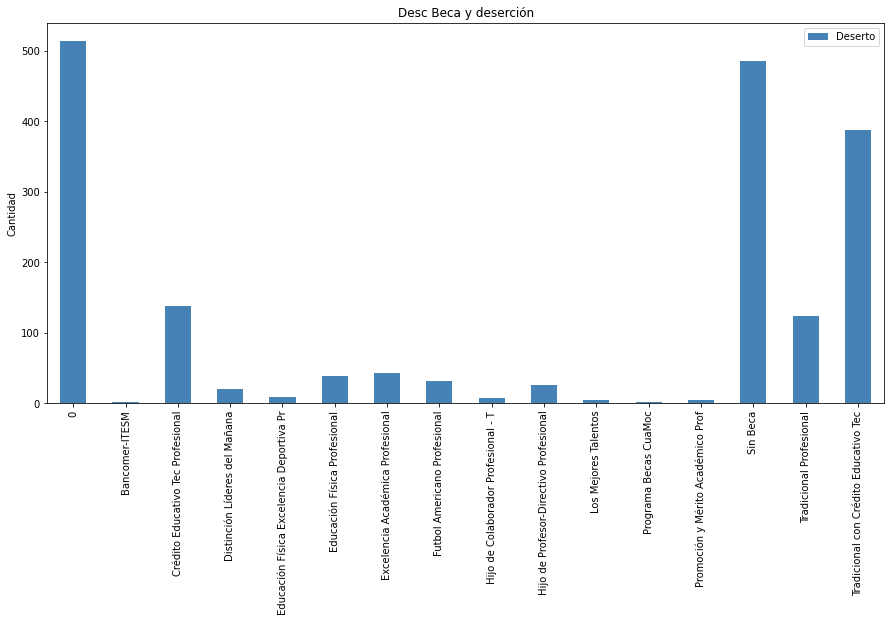

In [ ]:
pd.crosstab(df['Desc Beca'], df['Retención.1er.año'][0]).plot(kind='bar', figsize = (15,7), color='Steelblue')
plt.title('Desc Beca y deserción')
plt.xlabel('')
plt.legend(['Deserto','No deserto'])
plt.ylabel('Cantidad')

In [ ]:
distinto_Estado = df[df['Estado Escuela'] != df['Estado Domicilio']]
Desercion_distinto_estado = distinto_Estado[distinto_Estado['Retención.1er.año'] == 0]
Desercion_distinto_estado.shape
#Vemos si hay casos de deserción por domicilio en distinto estado que el de la escuela

(39, 45)

In [ ]:
distinto_Pais = df[df['Pais Escuela'] != df['País Domicilio']]
Desercion_distinto_Pais = distinto_Pais[distinto_Pais['Retención.1er.año'] == 0]
Desercion_distinto_Pais.shape
#Vemos si hay casos de deserción por domicilio en distinto país que el de la escuela

(3, 45)